In [2]:
# Downloading setup_script.py
! wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/a0e6fc59-46f5-4e1b-9f8a-046facdc2dfc/setup_script.py

# Downloading dog_ages.csv
! wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/a0e6fc59-46f5-4e1b-9f8a-046facdc2dfc/dog_ages.csv



'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import requests

# Function to download a file
def download_file(url, filename):
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    with open(filename, 'wb') as file:
        file.write(response.content)

# Download setup_script.py
download_file(
    'https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/a0e6fc59-46f5-4e1b-9f8a-046facdc2dfc/setup_script.py',
    'setup_script.py'
)

# Download dog_ages.csv
download_file(
    'https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/a0e6fc59-46f5-4e1b-9f8a-046facdc2dfc/dog_ages.csv',
    'dog_ages.csv'
)

print('Files downloaded successfully.')


Files downloaded successfully.


## Leverages

<Axes: >

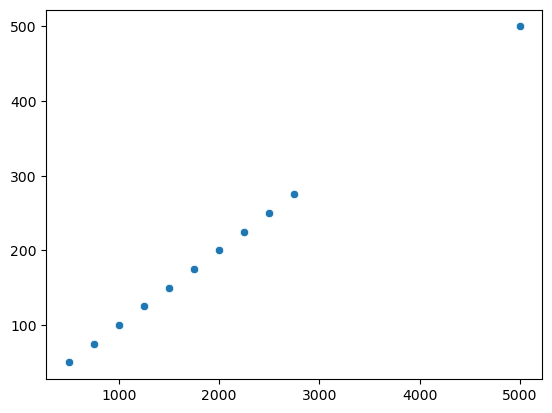

In [4]:
import seaborn as sns
floorplan_area = [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 5000]
price_in_thousands = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 500]


sns.scatterplot(x=floorplan_area, y=price_in_thousands)

In [5]:
floorplan_area = [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 5000]
print("mean floorplan area with leverage: ", sum(floorplan_area)/len(floorplan_area))
print("mean floorplan area without leverage: ", sum(floorplan_area[:-1])/len(floorplan_area[:-1]))

mean floorplan area with leverage:  1931.8181818181818
mean floorplan area without leverage:  1625.0


slope of no leverage:  0.1
slope of leverage:  0.1111111111111111


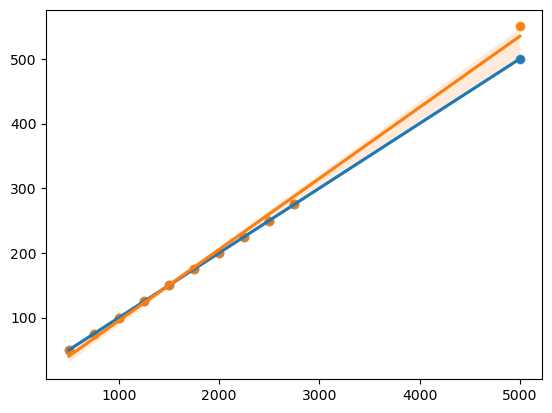

In [6]:
price_no_change = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 500]
price_leverage_change = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 550]

# plot both distributions
sns.scatterplot(x=floorplan_area, y=price_no_change)
sns.scatterplot(x=floorplan_area, y=price_leverage_change)

# fit a line to both distributions
sns.regplot(x=floorplan_area, y=price_no_change)
sns.regplot(x=floorplan_area, y=price_leverage_change)

# print the slope of both distributions
print("slope of no leverage: ", (price_no_change[-1]-price_no_change[0])/(floorplan_area[-1]-floorplan_area[0]))
print("slope of leverage: ", (price_leverage_change[-1]-price_leverage_change[0])/(floorplan_area[-1]-floorplan_area[0]))

slope of no leverage:  0.1
slope of leverage:  0.1


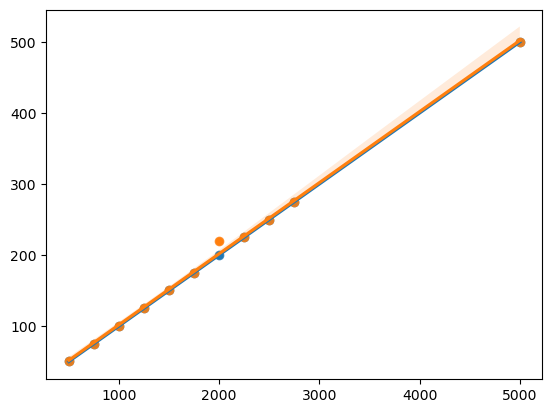

In [7]:
price_no_change = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 500]
price_leverage_change = [50, 75, 100, 125, 150, 175, 220, 225, 250, 275, 500]

# plot both distributions
sns.scatterplot(x=floorplan_area, y=price_no_change)
sns.scatterplot(x=floorplan_area, y=price_leverage_change)

# fit a line to both distributions
sns.regplot(x=floorplan_area, y=price_no_change)
sns.regplot(x=floorplan_area, y=price_leverage_change)

# print the slope of both distributions
print("slope of no leverage: ", (price_no_change[-1]-price_no_change[0])/(floorplan_area[-1]-floorplan_area[0]))
print("slope of leverage: ", (price_leverage_change[-1]-price_leverage_change[0])/(floorplan_area[-1]-floorplan_area[0]))

## Y-dimension Outliers

slope of regression line:  5.037344602103992
Mean Squared Error (MSE) of the regression line:  20.0777220278863


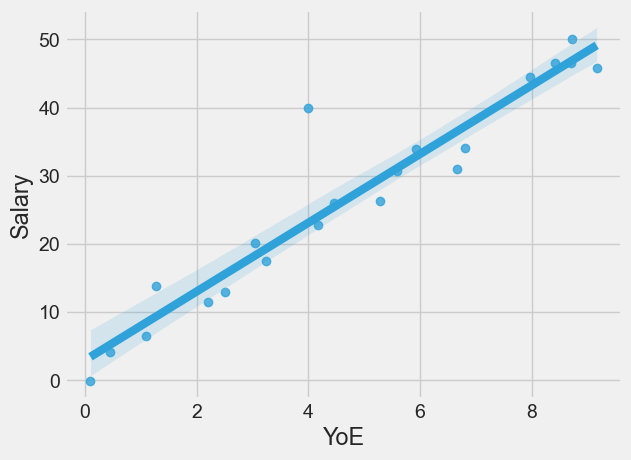

In [13]:
import setup_script
df_list = setup_script.df_list
from scipy.stats import linregress
import numpy as np


# fit a line to both distributions
sns.regplot(x=df_list[1]['YoE'], y=df_list[1]['Salary'])

# Compute the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(df_list[1]['YoE'], df_list[1]['Salary'])

# Predict the values using the regression line
predicted_values = slope * df_list[1]['YoE'] + intercept

# Compute the residuals
residuals = df_list[1]['Salary'] - predicted_values

# Compute the MSE
mse = np.mean(residuals**2)

# print the slope of the regression line
print("slope of regression line: ", slope)

# print the MSE of the regression line
print("Mean Squared Error (MSE) of the regression line: ", mse)

For all data:
Slope of regression line:  5.037344602103992
Mean Squared Error (MSE) of the regression line:  20.0777220278863

For data without outlier:
Slope of regression line:  5.116869021677885
Mean Squared Error (MSE) of the regression line:  6.0465602738206


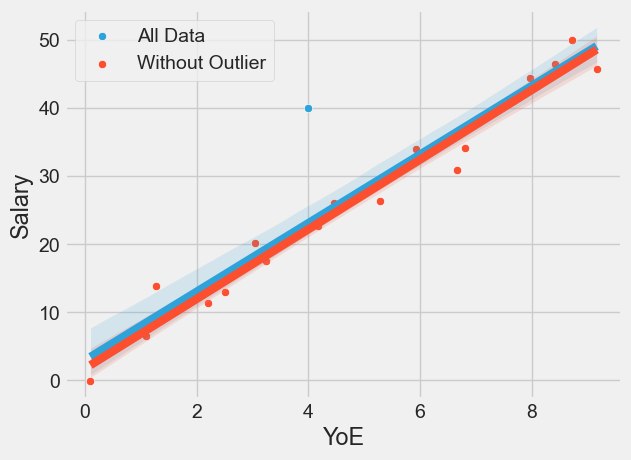

In [14]:
from scipy.stats import linregress

# Plotting scatter plots for both datasets
sns.scatterplot(x=df_list[1]['YoE'], y=df_list[1]['Salary'], label='All Data')
df_no_outlier= df_list[1].iloc[:-1]
sns.scatterplot(x=df_no_outlier['YoE'], y=df_no_outlier['Salary'], label='Without Outlier')

# Fit regression lines to both distributions
sns.regplot(x=df_list[1]['YoE'], y=df_list[1]['Salary'], scatter=False, label='Regression All Data')
sns.regplot(x=df_no_outlier['YoE'], y=df_no_outlier['Salary'], scatter=False, label='Regression Without Outlier')

# Compute regression parameters for all data
slope_all, intercept_all, _, _, _ = linregress(df_list[1]['YoE'], df_list[1]['Salary'])
predicted_all = slope_all * df_list[1]['YoE'] + intercept_all
mse_all = np.mean((df_list[1]['Salary'] - predicted_all)**2)

# Compute regression parameters for data without outlier
slope_no_outlier, intercept_no_outlier, _, _, _ = linregress(df_no_outlier['YoE'], df_no_outlier['Salary'])
predicted_no_outlier = slope_no_outlier * df_no_outlier['YoE'] + intercept_no_outlier
mse_no_outlier = np.mean((df_no_outlier['Salary'] - predicted_no_outlier)**2)

# Print the results
print("For all data:")
print("Slope of regression line: ", slope_all)
print("Mean Squared Error (MSE) of the regression line: ", mse_all)

print("\nFor data without outlier:")
print("Slope of regression line: ", slope_no_outlier)
print("Mean Squared Error (MSE) of the regression line: ", mse_no_outlier)

For all data:
Slope of regression line:  5.037344602103992
Mean Squared Error (MSE) of the regression line:  20.0777220278863

For data without outlier:
Slope of regression line:  5.116869021677885
Mean Squared Error (MSE) of the regression line:  6.0465602738206


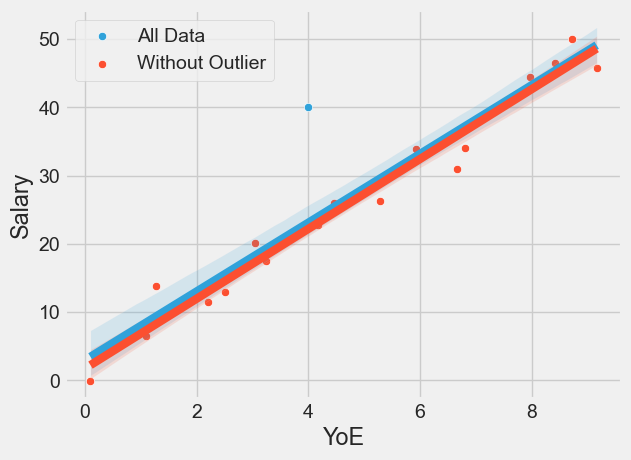

In [15]:

from scipy.stats import linregress

# Plotting scatter plots for both datasets
sns.scatterplot(x=df_list[1]['YoE'], y=df_list[1]['Salary'], label='All Data')
df_no_outlier= df_list[1].iloc[:-1]
sns.scatterplot(x=df_no_outlier['YoE'], y=df_no_outlier['Salary'], label='Without Outlier')

# Fit regression lines to both distributions
sns.regplot(x=df_list[1]['YoE'], y=df_list[1]['Salary'], scatter=False, label='Regression All Data')
sns.regplot(x=df_no_outlier['YoE'], y=df_no_outlier['Salary'], scatter=False, label='Regression Without Outlier')

# Compute regression parameters for all data
slope_all, intercept_all, _, _, _ = linregress(df_list[1]['YoE'], df_list[1]['Salary'])
predicted_all = slope_all * df_list[1]['YoE'] + intercept_all
mse_all = np.mean((df_list[1]['Salary'] - predicted_all)**2)

# Compute regression parameters for data without outlier
slope_no_outlier, intercept_no_outlier, _, _, _ = linregress(df_no_outlier['YoE'], df_no_outlier['Salary'])
predicted_no_outlier = slope_no_outlier * df_no_outlier['YoE'] + intercept_no_outlier
mse_no_outlier = np.mean((df_no_outlier['Salary'] - predicted_no_outlier)**2)

# Print the results
print("For all data:")
print("Slope of regression line: ", slope_all)
print("Mean Squared Error (MSE) of the regression line: ", mse_all)

print("\nFor data without outlier:")
print("Slope of regression line: ", slope_no_outlier)
print("Mean Squared Error (MSE) of the regression line: ", mse_no_outlier)


## Strategies for Detecting Outliers

## box plot

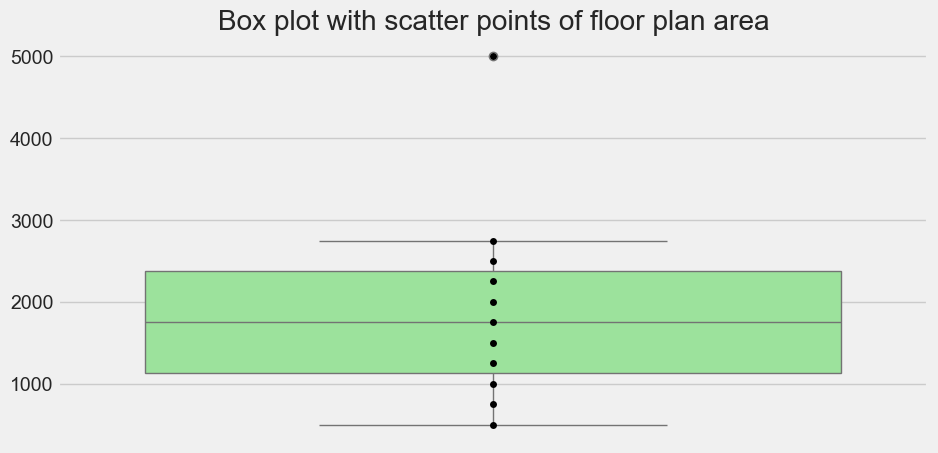

In [16]:
# Display a box plot with scatter points for Floorplan Area
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.boxplot(y=floorplan_area, color='lightgreen', showfliers=True)
sns.swarmplot(y=floorplan_area, color='black', size=5)
plt.title('Box plot with scatter points of floor plan area')
plt.show()

## Histogram

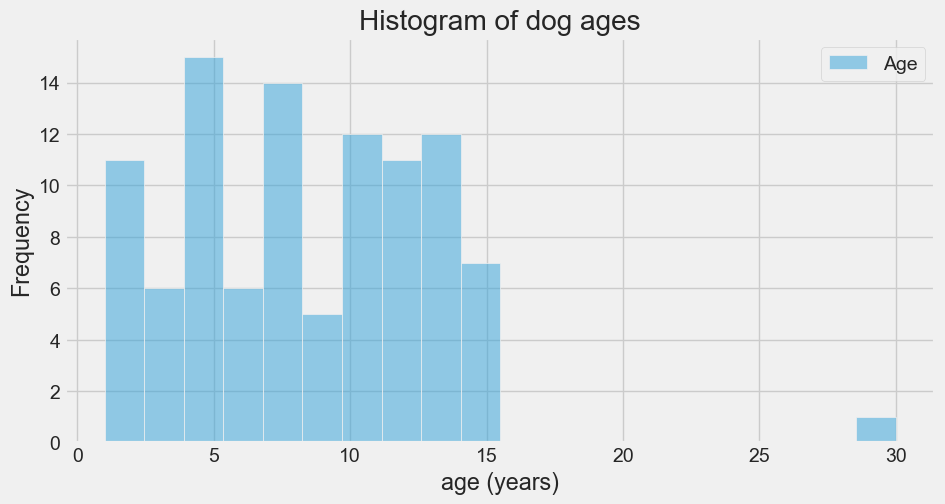

In [17]:
import pandas as pd
dog_ages = pd.read_csv("dog_ages.csv")
plt.figure(figsize=(10, 5))
sns.histplot(dog_ages, bins=20, kde=False)
plt.title('Histogram of dog ages')
plt.xlabel('age (years)')
plt.ylabel('Frequency')
plt.show()

## Scatter plot

<Axes: xlabel='YoE', ylabel='Salary'>

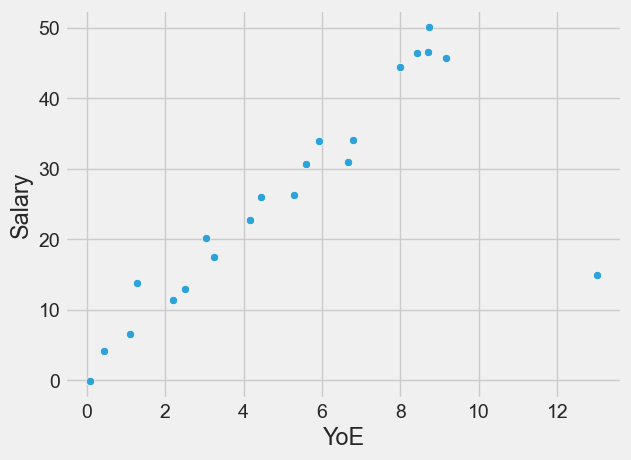

In [18]:
# Plotting scatter plots for both datasets
sns.scatterplot(x=df_list[3]['YoE'], y=df_list[3]['Salary'])

### Statistical Methods for Outlier Detection

1. Z- score

In [19]:
# Calculate the Z-Scores for YoE
mean_yoe = np.mean(dog_ages)
std_yoe = np.std(dog_ages)
z_scores_dog = (dog_ages - mean_yoe) / std_yoe
dog_ages_z = dog_ages
# Add th z-scores to the dataframe as a new column:
dog_ages_z['z_scores'] = z_scores_dog

# Show the last 10 rows of the dataframe
dog_ages_z.tail(10)

c:\Users\Thenu\AppData\Local\anaconda3\envs\internship\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,Age,z_scores
90,6,-0.517109
91,6,-0.517109
92,10,0.327151
93,4,-0.939239
94,6,-0.517109
95,13,0.960345
96,15,1.382475
97,2,-1.361369
98,10,0.327151
99,30,4.548449


2. IQR (Interquartile Range)

In [20]:
Q1 = dog_ages['Age'].quantile(0.25)
Q3 = dog_ages['Age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

# Identify outliers
outliers = dog_ages[(dog_ages['Age'] < (Q1 - 1.5 * IQR)) | (dog_ages['Age'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers)

Q1 (25th percentile): 4.75
Q3 (75th percentile): 12.0
IQR: 7.25
Outliers:
    Age  z_scores
99   30  4.548449


### Handling Outliers
- **Remove**
- **Keep**
- **replace**



### Detecting Outliers in Categorical Data
- Frequency Analysis
- Domain Knowledge
- Cross-Validation with Other Data Sources
- Grouping Categories
- Resampling
- Expert Review

### Handling Categorical Outliers
- Retain
- Remove
- Replace